# <u>Project Group 13</u>


## Introduction


We initially chose a different data set but we were reccomened to select another as the data was ficticious and there were only 8 columns of data. We found this data set which is very similar to the one we initally selected but it is real data and there are 33 columns.

We were interested in this type of dataset, student preformance, as it seemed very topical as we are students and were interested to learn about the ways specific things may be influencing our academic preformance.


| Adam Bunce | Addison Tung  | Santhosh Chelvaranjan |
| :- | -: | :-: |
| Notebook Set Up | Correlation Analysis | Boxplot's
| Scatter/Swarm Plots | Research Questions | Blog Post
| Correlations |Blog Post | 
| Feature Importance |  | 
| Blog Markdown |  | 



# Description Of Data

Our Data consists of 395 secondary student's scores in math and portuguese language courses obtained through a survey. Along with this we are given information about the student's; age, sex, internet access, drinking habits, family situation, study habits and much more.


**Dataset Name:** Student Alcohol Consumption, social, gender and study data from secondary school students


**Source:**       [Kaggle Dataset](https://www.kaggle.com/uciml/student-alcohol-consumption)


# Analysis of Data
- Provide a detailed, well-organized description of data quality, including the features, any data that should be cleaned or pre-processed before you EDA.


In [222]:
import csv
import re
from functools import reduce
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plot
!{sys.executable} -m pip install seaborn
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore') # gets rid of red annoying warning

def get_data_math(file_name):
    collection = []
    with open(file_name, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        


math_data = get_data_math('student-mat.csv')
portugese_data = get_data_math('student-por.csv')

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [219]:
df_math = pd.DataFrame(math_data)
df_por = pd.DataFrame(portugese_data)

# Dropping Columns with bad info (all the data is fine actually though so no cleaning is needed)
# No pre-processing b/c there's no possiblity of contradicting variables afaik (eg. no pregnant men)
print(df_math.isna().sum())
print('\n')
print(df_por.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health   

All of the data included in the csv files for both math and portugese is good and doesn't need any cleaning or pre-processing.

In [223]:
def print_unique_identifiers(col_header):
    
    print( '\x1b[1;30m'+ col_header + ": " + '\x1b[0m', end="")
    # change df_math to df_por to see their variables but they are more or less identical.
    hold = pd.unique(df_math[col_header])
    # sorted doesnt really work for integer strings can fix but idk if worth effort tbhh
    #print(', '.join(sorted(pd.unique(df_math[col_header]))))
    print((sorted(pd.unique(df_math[col_header]))))
    return None # without this list goes red
 
# convert all int values to int instead of str
for value in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
              'failures', 'famrel', 'freetime', 'goout', 'Dalc',
              'Walc', 'health', 'absences', 'G1', 'G2', 'G3']:
    df_math[value] = df_math[value].astype(int)
    df_por[value] = df_por[value].astype(int)
    


list(map(print_unique_identifiers, df_math));
print('\nmath\nColumns: ' +str(df_math.shape[0]) + '\nRows :   '+ str(df_math.shape[1]))   
print('\nportugese\nColumns: ' +str(df_por.shape[0]) + '\nRows :   '+ str(df_por.shape[1]))   

school: ['GP', 'MS']
sex: ['F', 'M']
age: [15, 16, 17, 18, 19, 20, 21, 22]
address: ['R', 'U']
famsize: ['GT3', 'LE3']
Pstatus: ['A', 'T']
Medu: [0, 1, 2, 3, 4]
Fedu: [0, 1, 2, 3, 4]
Mjob: ['at_home', 'health', 'other', 'services', 'teacher']
Fjob: ['at_home', 'health', 'other', 'services', 'teacher']
reason: ['course', 'home', 'other', 'reputation']
guardian: ['father', 'mother', 'other']
traveltime: [1, 2, 3, 4]
studytime: [1, 2, 3, 4]
failures: [0, 1, 2, 3]
schoolsup: ['no', 'yes']
famsup: ['no', 'yes']
paid: ['no', 'yes']
activities: ['no', 'yes']
nursery: ['no', 'yes']
higher: ['no', 'yes']
internet: ['no', 'yes']
romantic: ['no', 'yes']
famrel: [1, 2, 3, 4, 5]
freetime: [1, 2, 3, 4, 5]
goout: [1, 2, 3, 4, 5]
Dalc: [1, 2, 3, 4, 5]
Walc: [1, 2, 3, 4, 5]
health: [1, 2, 3, 4, 5]
absences: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 38, 40, 54, 56, 75]
G1: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
G2: [

# Exploratory Data Analysis
- Provide a detailed, well-organized description of your findings, including textual description, graphs, and code. Your focus should be on both the results and the process. Include, as reasonable and relevant, approaches that didn’t work, challenges, the data cleaning process, etc.

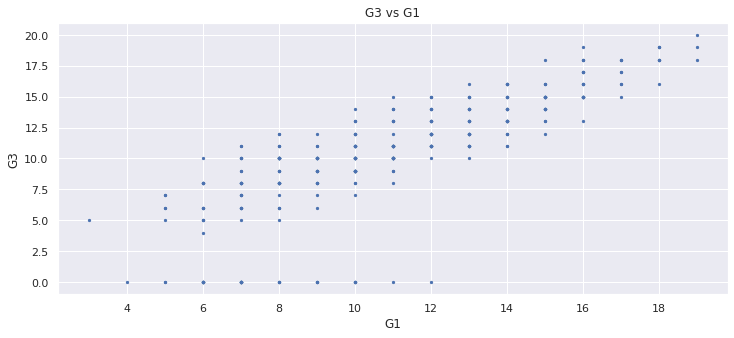

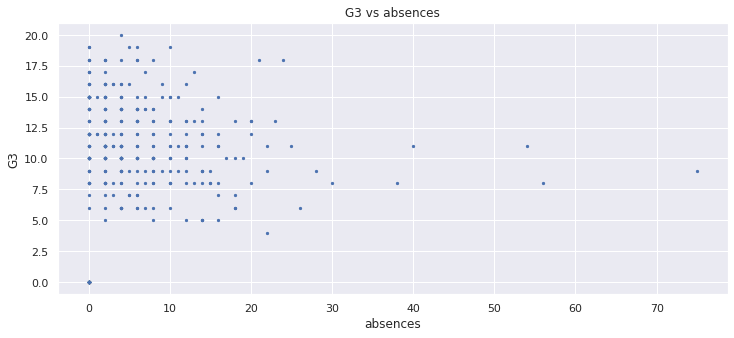

In [227]:
# initally tried using scatter plots to look for correlations but
# the .corr method seemed better as i wouldnt need to look at 33*33 graphs
def math_scatterplot(xcol, ycol):
    plot.scatter(df_math[xcol], df_math[ycol], s=5); #s=int changes marker size
    plot.title(ycol + ' vs ' + xcol);
    plot.ylabel(ycol);
    plot.xlabel(xcol);

    plot.show()
    

math_scatterplot('G1', 'G3')
math_scatterplot('absences', 'G3')

There is an obvious correlation between first period grades and final grades, which makes sense.

There is no correlation to be seen with the scatter plot of final grades and # of absences. This method for looking for correlations between variables seems very inefficent as one would need to look at every possible combination of variables to find correlations; which would be a lot of graphs.

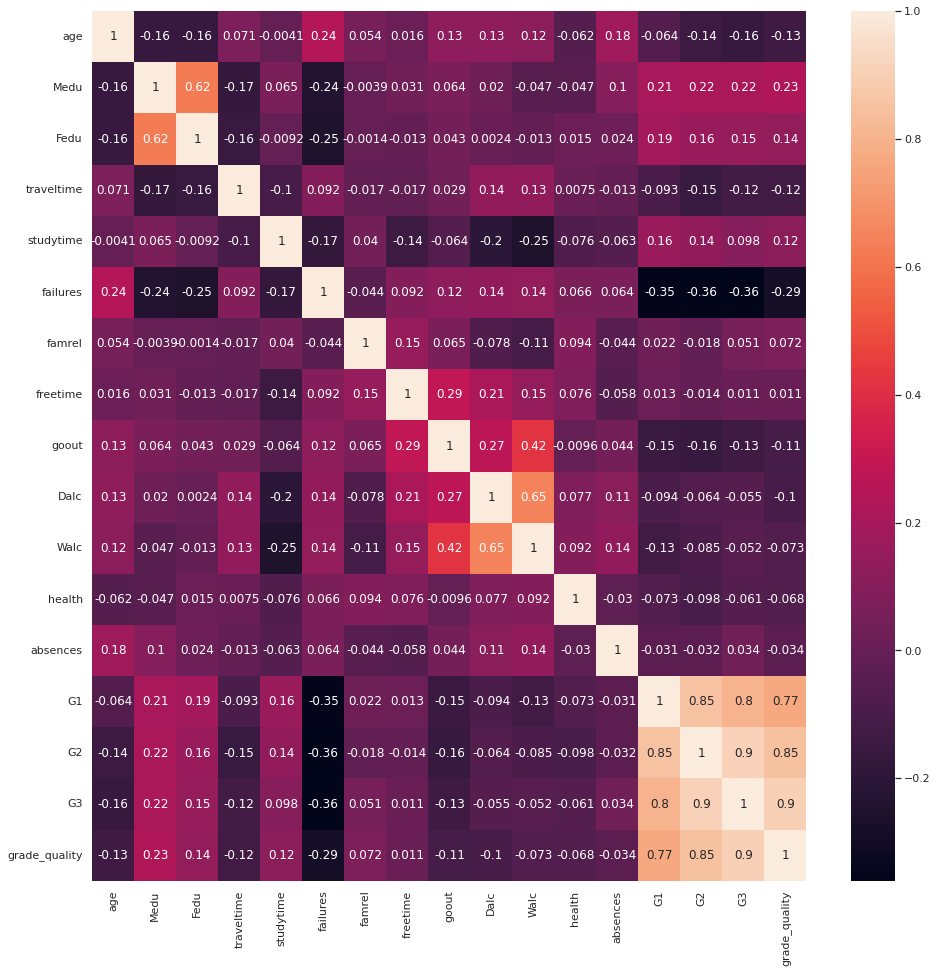

In [254]:
# faster way to identify possible correlations 
corr = df_math.corr(method ='pearson')
#print(corr)

#print("heatmap of correlation")
plot.figure(figsize=(16,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True);

### Possible Correlations:
**Adam's notes:**

**age-failures:** can be explained as the older you get the more chances you have to fail

**medu-g1:g3 :** the more educated the mother is the better the performance of the student
what is interesting about this is that the mother's education has a stronger correlation with the students performance  than the father's education level. (fedu)

**studytime:g1-g3:** correlation between study time and performance.

**freetime:gout/dalc:** more free time means more time to drink and go out.
    
**absences:walc/dalc** although weak this shows that if you drink on the weekend you're more likely to miss class.

**g1:g2:g3** if you're going to do well you're going to be doing well from the get-go

<br>

**Addison's notes:**

**famrel** weak correlation between family relationship and performance, but correlates to freetime/gout/Dalc/Walc.

**studytime-failures** less study time leads to increase in chance of failure.

**health** weak correlation to every other attribute in the set, could be ignored?

**walc/dalc** general observation: alcohol consumption has stronger correlations with age, traveltime(odd?), study time(inverse), failures/gout/absences(as adam noted above). But has weak correlation with student performance. maybe comparing alcohol use to final grades is a bad section to focus on?

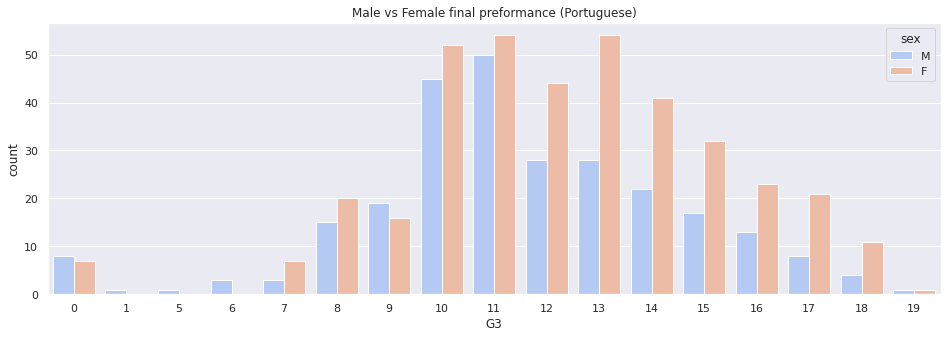

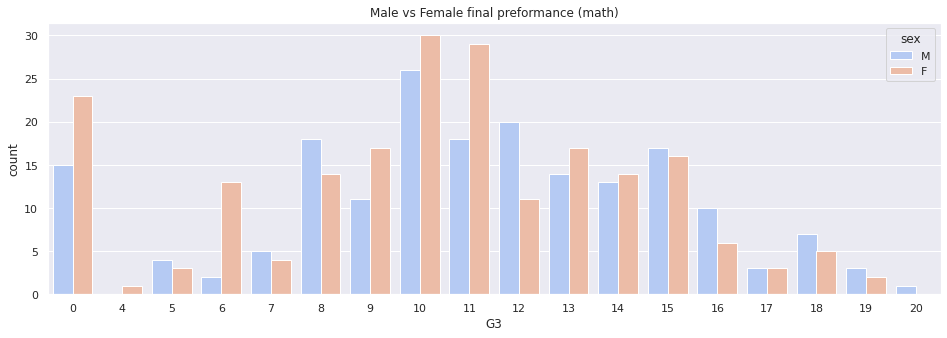

In [228]:
# countplots to look for trends betweeen gender and preformance
plot.figure(figsize=(16,5))
hold2 = sns.countplot(data = df_por, x='G3', hue='sex', palette='coolwarm', 
                      hue_order=['M', 'F']).set(title = "Male vs Female final preformance (Portuguese)")

plot.figure(figsize=(16,5))
hold1 = sns.countplot(data = df_math, x='G3', hue='sex', palette='coolwarm', 
                      hue_order=['M', 'F']).set(title = "Male vs Female final preformance (math)")


It seems that females preform much better in the Portuguese language course and that men tend to be make up a larger share of the highest marks in math.

What could account for women seeming to do so much better than men in Portuguese, maybe the gender ratio is just imbalanced? 

Portuguese
F: 383 M: 266
Math
F: 208 M: 187


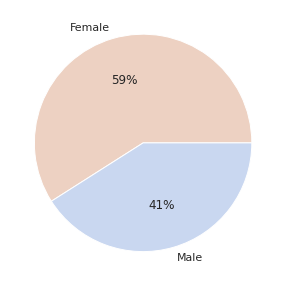

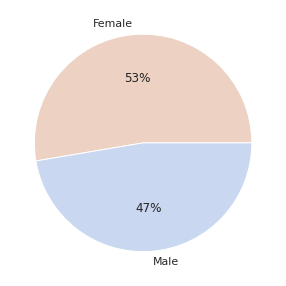

In [199]:
gender_ratio_por = df_por['sex'].value_counts()
gender_ratio_math = df_math['sex'].value_counts()

plot.figure(figsize=(16,5))
print("Portuguese")
print("F: " + str(gender_ratio_por[0]) + " M: "+ str(gender_ratio_por[1] ))
colors = sns.color_palette('coolwarm_r')[2:10]
labels = ['Female', 'Male']
plot.pie(gender_ratio_por, labels = labels, colors = colors, autopct='%.0f%%');

plot.figure(figsize=(16,5))
print("Math")
print("F: " + str(gender_ratio_math[0]) + " M: "+ str(gender_ratio_math[1] ))
plot.pie(gender_ratio_math, labels = labels, colors = colors, autopct='%.0f%%');

There are 117 more females than males in the Portuguese class which explains why the countplot skewed so heavily towards females

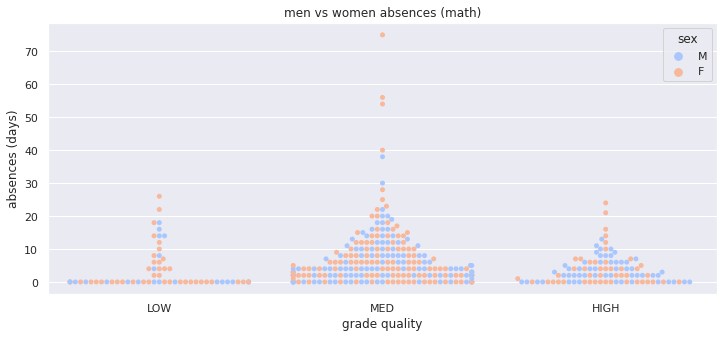

In [230]:
 # creates a new column to quanitify the quality of the final grade of the student
df_math['grade_quality'] = df_math['G3']
def grade_quality(number):
    if 0 <= number <= 6.66:
        return 'LOW'
    elif 6.67 <= number <= 13.33:
        return 'MED'
    else:
        return 'HIGH'

df_math['grade_quality'] = df_math['grade_quality'].apply(grade_quality)

sns.set(rc={'figure.figsize':(12,5)})
plot = sns.swarmplot(x='grade_quality', y='absences', hue='sex', data=df_math, palette='coolwarm', hue_order=['M', 'F']);
plot.set(xlabel='grade quality', ylabel='absences (days)', title='men vs women absences (math)');

Students with low and medium grades tend to have more days of class from which they were absent. This can be observed from the above graph as the graphs of Medium and High-level students tend to be flatter.

It seems that women tend to miss more classes than men. This could possibly be accounted for due to menstruation.

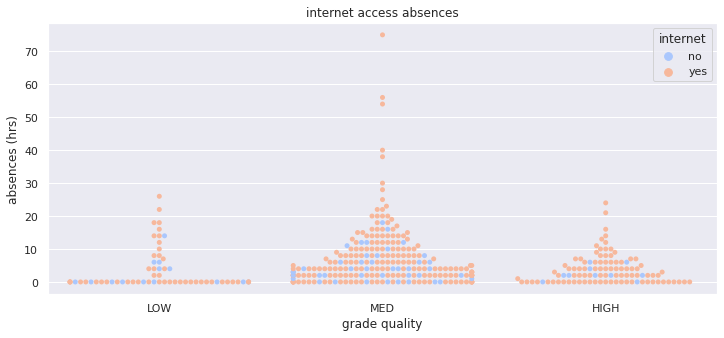

In [201]:
sns.set(rc={'figure.figsize':(12,5)})
plot = sns.swarmplot(x='grade_quality', y='absences', hue='internet', data=df_math, palette='coolwarm');
plot.set(xlabel='grade quality', ylabel='absences (days)', title='internet access absences');

Students without internet are over represented in the low grade quality category.

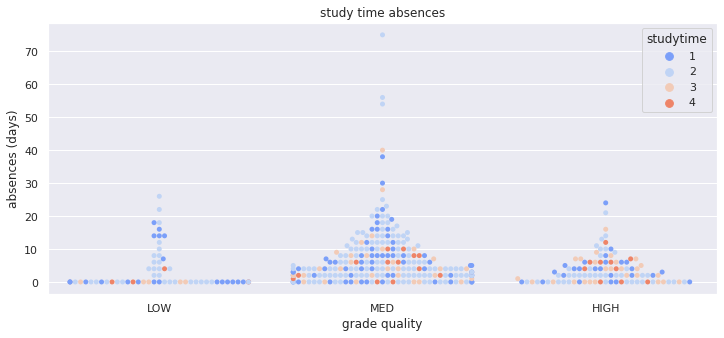

In [233]:
# kinda have to keep absences as its the only variable with a large enough range for the graph to look good
plot = sns.swarmplot(x='grade_quality', y='absences', hue='studytime', data=df_math, palette='coolwarm');
plot.set(xlabel='grade quality', ylabel='absences (days)', title='study time absences');

Students who have a higher study time tend to appear more frequently in the High quality grade section as opposed to the Low quality grade section

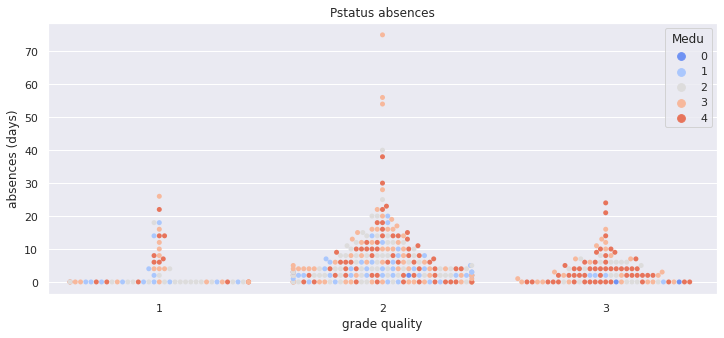

In [263]:
# looking for other attributes that could explain performance
sns.set(rc={'figure.figsize':(12,5)})
plot = sns.swarmplot(x='grade_quality', y='absences', hue='Medu', data=df_math, palette='coolwarm');
plot.set(xlabel='grade quality', ylabel='absences (days)', title='Pstatus absences');

Students whose mothers have a higher education tend to have higher grade quality.

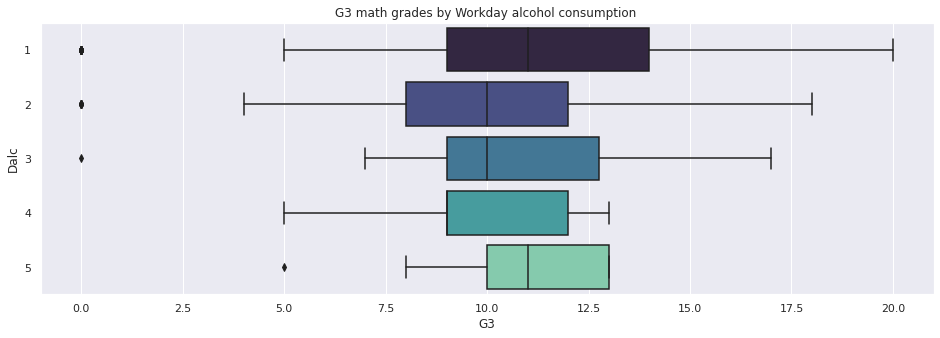

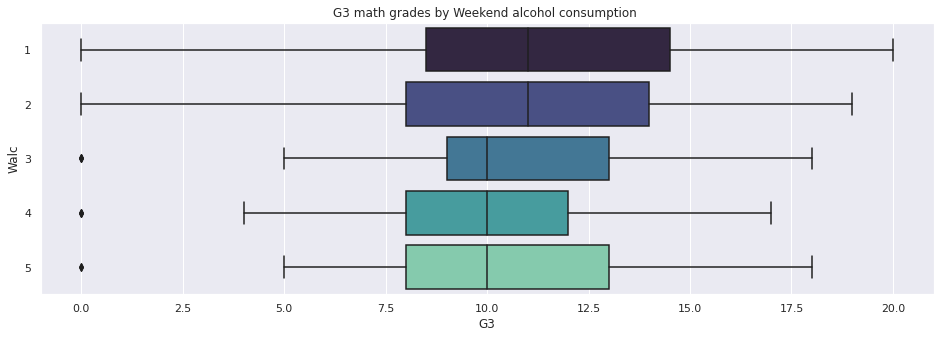

In [215]:
# Does alcohol consumption affect grades?
plot.figure(figsize=(16,5));
plot.title("G3 math grades by Workday alcohol consumption ");
sns.boxplot(y="Dalc", x="G3", data = df_math , orient="h", palette = 'mako');

plot.figure(figsize=(16,5));
plot.title("G3 math grades by Weekend alcohol consumption ");
sns.boxplot(y="Walc", x="G3", data = df_math , orient="h", palette = 'mako');

Drinking a lot of alcohol or very low amount alcohol during Workdays have the same median grade. However, the students with the highest grades drank very little alchohol during workdays. 

Drinking very little alcohol during weekends will give a higher grade average as the median is the highest. The students with the highest grades drank very little alchohol during weekends. 

Overall, just drinking less alcohol gives you a higher chance of getting a good grade.

<AxesSubplot:title={'center':'G3 math grades by Extra paid classes'}, xlabel='G3', ylabel='paid'>

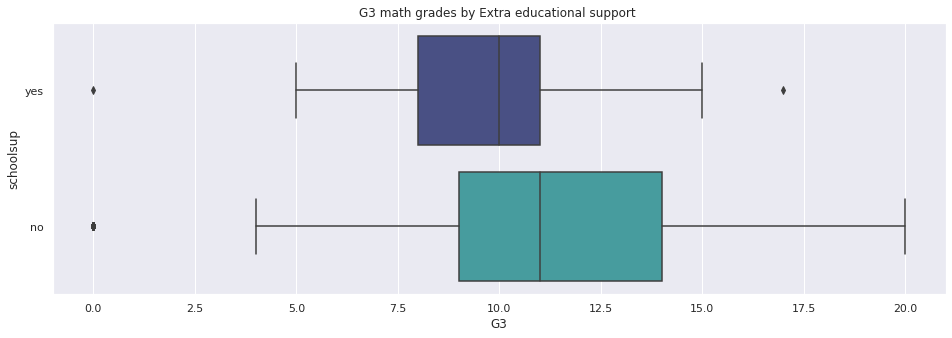

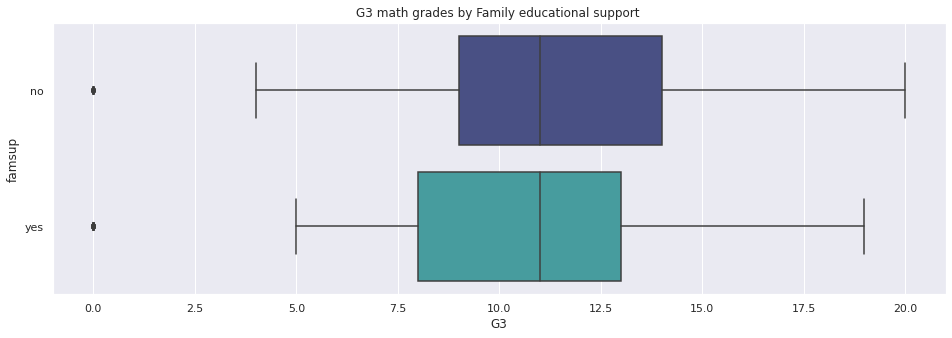

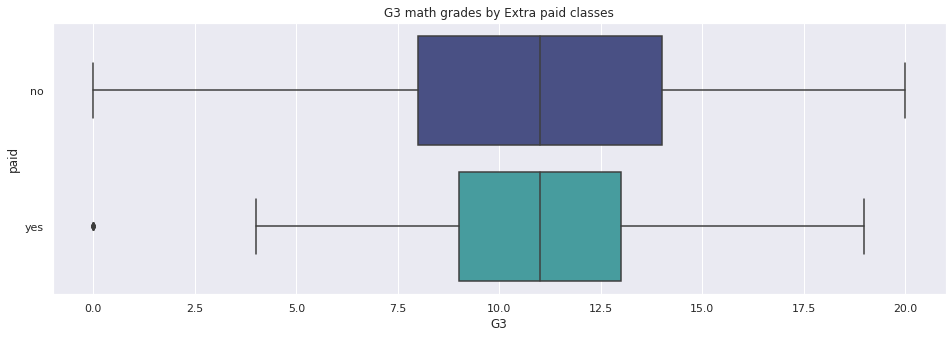

In [237]:
#Does having more educational support affect grades?
import matplotlib.pyplot as plot
plot.figure(figsize=(16,5))
plot.title("G3 math grades by Extra educational support ")
sns.boxplot(y="schoolsup", x="G3", data = df_math , orient="h", palette = 'mako')

plot.figure(figsize=(16,5))
plot.title("G3 math grades by Family educational support ")
sns.boxplot(y="famsup", x="G3", data = df_math , orient="h", palette = 'mako')

plot.figure(figsize=(16,5))
plot.title("G3 math grades by Extra paid classes")
sns.boxplot(y="paid", x="G3", data = df_math , orient="h", palette = 'mako')

Having no extra educational support gave you a higher median grade. The students with the highest grade also has no extra educational support. This could mean that the smarter students felt confident that they didnt need extra educational support. It could also mean the extra educational support isn't helpful towards students.

Family educational support barely affect your grades as the median grade is the same. However the lowest grade you can get is higher if you have educational support from your family.

Extra paid classes barely affect your grades as the median grade is the same. However the lowest grade you can get is higher if you take paid classes.

Overall, having more educational support doesn't really affect your grades. In fact, the students with the highest grades had no extra help.

<AxesSubplot:title={'center':'G3 math grades by Free time after school'}, xlabel='G3', ylabel='freetime'>

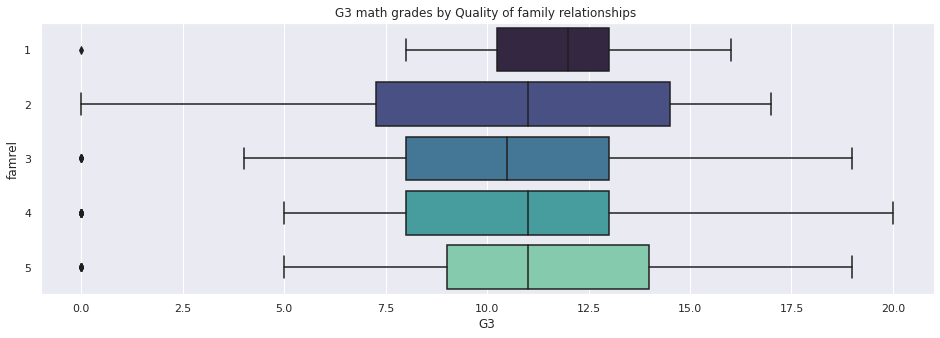

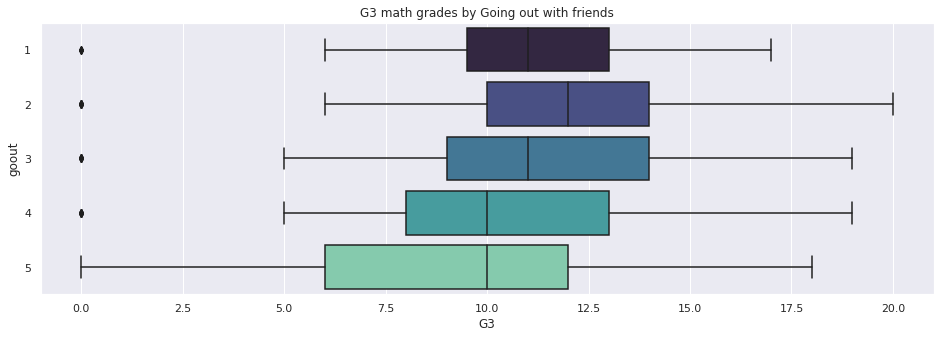

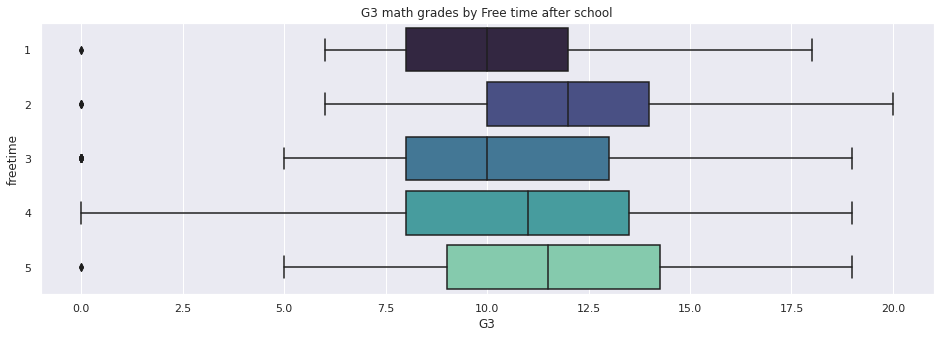

In [238]:
#Does a better quality of life affect grades?
plot.figure(figsize=(16,5))
plot.title("G3 math grades by Quality of family relationships ")
sns.boxplot(y="famrel", x="G3", data = df_math , orient="h", palette = 'mako')

plot.figure(figsize=(16,5))
plot.title("G3 math grades by Going out with friends")
sns.boxplot(y="goout", x="G3", data = df_math , orient="h", palette = 'mako')

plot.figure(figsize=(16,5))
plot.title("G3 math grades by Free time after school")
sns.boxplot(y="freetime", x="G3", data = df_math , orient="h", palette = 'mako')

It's surpising that having a very bad quality of family relationships gives a higher median grade. However, the students with the highest grades have a excellent relationship with there family. 

Going out with friends less gives a higher average grade. This could be because they are spending more time studying instead of going out with friends. The student with the lowest grade was going out with friends the most.

Having less freetime gives a higher average grade. The student with the lowest grade had a lot of free time while the student with the highest grade had less free time. 

In [239]:
# need to convert to integers to it can be processed properly, throws errors for strings
# somtheing similar could be done to include other variables in the model
def grade_quality_integer(string):
    if string == 'LOW':
        return 1
    elif string == 'MED':
        return 2
    else:
        return 3

df_math['grade_quality'] = df_math['grade_quality'].apply(grade_quality_integer)

train_data = df_math


# need to drop all non-numeric columns
train_X = train_data.drop(columns=['grade_quality','school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                                   'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher',
                                  'internet', 'romantic','G3', 'G1', 'G2'])

#trying to predict these
train_Y = train_data[['grade_quality', 'G1', 'G2', 'G3']]

# split the data up
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

In [240]:

#create model
model_linear_regression = LinearRegression();
model_linear_regression.fit(train_x, train_y);

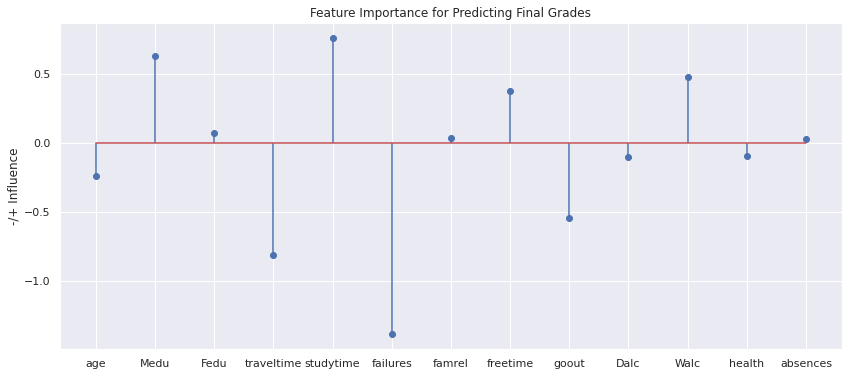

In [241]:

figure(figsize=(14, 6));


#print(model_LR.coef_[0])   <--- all zeros for some reason so i guess it cant predict grade quality ? 
                                                         # maybe because 1-3 is too small of a range
# model_LR.coef_[1] is g1
# model_LR.coef_[2] is g2

plot.stem(model_linear_regression.feature_names_in_, model_linear_regression.coef_[3]); 
plot.title('Feature Importance for Predicting Final Grades');
plot.ylabel("-/+ Influence");

I'm not completley sure if this regression model is prefectly accurate, but based on the above chart the results that it has given seem accurate as the chart makes sense.

Based on the above chart you can see that traveltime, failures and going out predict that students will receive a poor final grade.

study time, mothers’ education level and free time predict students will receive a good final grade, the strongest being study time. The more free time a student has the more likely they are to be good with time management, meaning they complete all of their work on time and thus would receive better grades

An interesting feature is drinking on the weekends. It seems to increase final grades but drinking <i> during </i> the week decreases final grades. This may the "work hard, party hard" idea; by blowing off steam on the weekends you can focus up during the week ensuring you do well. But if those habits carry over into the week it could be detrimental.


# Potential Data Science
- Based on your data analysis and findings. Describe any potential ideas if you were to pursue a data science or machine learning project using this dataset. If you don’t find any potential, explain your rationale.

We don't see many potential data science or machine learning projects using this particular dataset 

A model that predicts if a student is likely to be above or below average based on the control variables, simliar to the linear regression model I made but it could  be significanlty improved as linear regression is always accurate and ideal as it is a straight line, there are plenty of other regression types that could of done a better job with predictions.

Some sort of recommendation software that will tell the student things that need to be changed in order to increase their GPA, taking this idea a step further; some software that would implement a machine learning algorithm to help optimize a students life in order to maximize final grades. To do this more datapoints would be needed from every day life. A few that come to mind would how time on the internet is used; Youtube Vs KhanAcademy would have very different effects on final grades, exercise habits, sleeping habits, level of focus during class and information regarding completion of homework/practice problems.

This data could be obtined through IoT devices, like smart watches and eye trackers, that would send daily data to the machine learning algorithm which would then process it. The algorithm would optimize habits on a base by base case. Everyone is different, so the benefits of certian habits would also be different from person to person. Maybe individual A doesnt need to pay attention in class because watching a YouTube video on the subject is better, but individual B has to focus in class because when they turn on their computer they tend to open new tabs and not focus on the YouTube video. The algorithm would help to optimize the student in this sort of way.


# Conclusion
- Discuss limitations and future directions, lessons learned, maybe things you did not predict to find out or things you learned as you performed the analysis.

With this dataset there weren't many limitations. Initially we had selected a similar dataset relating to student test performance but there were only 8 columns of features, so we were recommended to change. Because this dataset has so many features if anything we were overwhelmed with possible options.

It was surprising to see that there were so many more women than men in the Portuguese language class; I had initially just assumed they would be equal for some reason.

A lot of our initial assumptions were proven to be correct; students with lower grades had more absences, less access to internet, studied less, frequently went out, and had less educated parents.

Students with higher grades were the opposite; they attended more classes, had internet access, studied a lot, and had educated parents. Students with higher grades also drank less alcohol during the week, and surprisingly the top students didn’t have any additional educational support.

It was determined through a linear regression model that the features that most influence a student’s success positively are; Mothers education level; the more education the better and the number of hours they spend studying. On the other hand, the features that most decrease students’ success are; travel time to get to the school, The number of classes they have failed before, and the frequency with which they go out.
